# Loan Approval or Not Prediction

In [151]:
import pandas as pd
import numpy as np

In [152]:
data = pd.read_csv('dataset/train_set.csv')
print(data['Gender'].value_counts())
print("Max data repeated on Gender Feature: {}".format(data['Gender'].value_counts().idxmax()))
print(data.shape)
data.head()

Gender
Male      489
Female    112
Name: count, dtype: int64
Max data repeated on Gender Feature: Male
(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [153]:
print("Null Data on Overall DataSet: \n{}".format(data.isnull().sum()))
print(data['LoanAmount'].value_counts())

Null Data on Overall DataSet: 
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
LoanAmount
120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
292.0     1
142.0     1
350.0     1
496.0     1
253.0     1
Name: count, Length: 203, dtype: int64


In [154]:
traind=data
# traind['Gender'].fillna(traind['Gender'].value_counts().idxmax(), inplace=True)

# traind['Married'].fillna(traind['Married'].value_counts().idxmax(), inplace=True)
# traind['Married'].isnull().sum() #checking Column based null values

# traind['Dependents'].fillna(traind['Dependents'].value_counts().idxmax(), inplace=True)
# traind['LoanAmount'].fillna(traind['LoanAmount'].mean(skipna=True), inplace=True)
# traind['Loan_Amount_Term'].fillna(traind['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
# traind['Credit_History'].fillna(traind['Credit_History'].value_counts().idxmax(), inplace=True)

traind.isnull().sum() # overall dataset Null Values checking

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [155]:
for i in traind.keys():
    if i != "LoanAmount":
        traind[i].fillna(traind[i].value_counts().idxmax(), inplace=True)
traind["LoanAmount"].fillna(traind["LoanAmount"].mean(skipna=True), inplace=True)
traind.isnull().sum() # overall dataset Null Values checking

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [156]:
traind.shape
traind['Gender'].unique()
print(traind)
traind['Gender']=traind['Gender'].replace({"Male":1,"Female":0})
traind['Married']=traind['Married'].replace({"Yes":1,"No":0})
traind['Dependents']=traind['Dependents'].replace({'0':0,'1':1,'2':2,'3+':3})
traind['Education']=traind['Education'].replace({"Graduate":1,"Not Graduate":0})
traind['Self_Employed']=traind['Self_Employed'].replace({"Yes":1,"No":0})
traind['Property_Area']=traind['Property_Area'].replace({'Semiurban' : 0, 'Urban' : 1,'Rural' : 2})
traind['Loan_Status']=traind['Loan_Status'].replace({"Y":1,"N":0})

print(traind)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0  146.412162           

In [157]:
# traind.to_csv('train_set_dp.csv',index=False)

# Test Set Data Preprocessing

In [158]:
import warnings

test_set = pd.read_csv('dataset/test_set.csv')



print(test_set.isnull().sum())

warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)

for i in test_set.keys():
    if i not in ["LoanAmount","Loan_ID"]:
        test_set[i].fillna(test_set[i].value_counts().idxmax(), inplace=True)
test_set["LoanAmount"].fillna(test_set["LoanAmount"].mean(skipna=True), inplace=True)
print(test_set.isnull().sum())

warnings.filterwarnings("ignore",category=FutureWarning)
test_set['Gender']=test_set['Gender'].replace({"Male":1,"Female":0})
test_set['Married']=test_set['Married'].replace({"Yes":1,"No":0})
test_set['Dependents']=test_set['Dependents'].replace({'0':0,'1':1,'2':2,'3+':3})
test_set['Education']=test_set['Education'].replace({"Graduate":1,"Not Graduate":0})
test_set['Self_Employed']=test_set['Self_Employed'].replace({"Yes":1,"No":0})
test_set['Property_Area']=test_set['Property_Area'].replace({'Semiurban' : 0, 'Urban' : 1,'Rural' : 2})

# test_set.to_csv("test_set_dp.csv",index=False)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as py
import seaborn as sns
import warnings
x,y=traind.iloc[:,1:12],traind.iloc[:,12]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

print(x_train.shape)
print(x_test.shape)

model_names=["Logistic","DecisionTree","Random Forest"]
accuracies=[]

# ss=StandardScaler()
# x_train_scaled = ss.fit_transform(x_train)
# x_test_scaled = ss.fit_transform(x_test)

# py.scatter(x_train,x_train_scaled,marker='o')
# # y_pred = lg.predict([[0,0,0,1,1,4853,0,133,360,0,0]])
# # print("Yes" if y_pred else "No")
# # y_pred = lg.predict([[1,1,2,1,0,7583,0,187,360,1,1]])
# # print("Yes" if y_pred else "No")
# # y_pred = lg.predict([[0,1,1,1,0,12000,0,496,360,1,0]])
# # print("Yes" if y_pred else "No")

# print(y_train)
# x_test.shape
# # x_test.isnull().sum()
# # x_test


(460, 11)
(154, 11)


In [169]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
data=pd.DataFrame(y_pred,columns=["output"])
print(accuracy_score(y_test,y_pred)*100)


accuracies.append(accuracy_score(y_test,y_pred)*100)

# print(accuracy_score(y_train[:data.shape[0]],data)*100)

# y_pred = lg.predict([[0,0,0,1,1,4853,0,133,360,0,0]])
# print("Yes" if y_pred else "No")
# y_pred = lg.predict([[1,1,2,1,0,7583,0,187,360,1,1]])
# print("Yes" if y_pred else "No")
# y_pred = lg.predict([[0,1,1,1,0,12000,0,496,360,1,0]])
# print("Yes" if y_pred else "No")

# print(cross_val_score(lg,x_train,y_train,cv=10).mean()*100)
# sns.countplot(data=data,x="output")
# py.show()

81.16883116883116


C:\Users\Moham\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


69.48051948051948


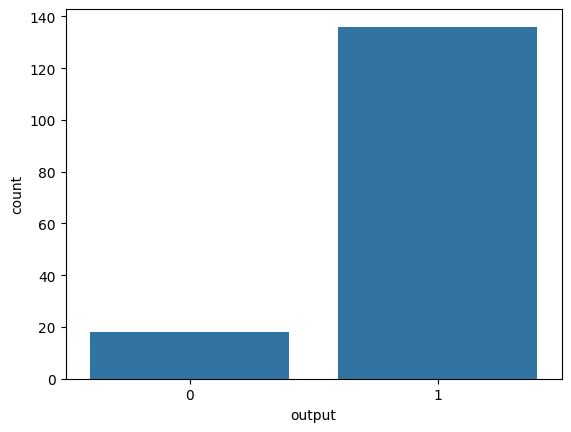

In [170]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)
accuracies.append(accuracy_score(y_test,y_pred)*100)
# y_pred = dt.predict([[0,0,0,1,1,4853,0,133,360,0,0]])
# print("Yes" if y_pred else "No")
# y_pred = dt.predict([[1,1,2,1,0,7583,0,187,360,1,1]])
# print("Yes" if y_pred else "No")
# y_pred = dt.predict([[0,1,1,1,0,12000,0,496,360,1,0]])
# print("Yes" if y_pred else "No")

# print(cross_val_score(dt,x_train,y_train,cv=10).mean()*100)

sns.countplot(data=data,x="output")
py.show()

In [171]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
data=pd.DataFrame(y_pred,columns=["output"])
print(data['output'].value_counts())
# print(accuracy_score(y_train[:data.shape[0]],data)*100)
accuracies.append(accuracy_score(y_test,y_pred)*100)


# y_pred = grid_search.predict([[0,0,0,1,1,4853,0,133,360,0,0]])
# print("Yes" if y_pred else "No")
# y_pred = grid_search.predict([[1,1,2,1,0,7583,0,187,360,1,1]])
# print("Yes" if y_pred else "No")
# y_pred = grid_search.predict([[0,1,1,1,0,12000,0,496,360,1,0]])
# print("Yes" if y_pred else "No")

print(y_test)
# sns.countplot(data=data,x="output")
# py.show()

output
1    132
0     22
Name: count, dtype: int64
285    1
323    1
482    1
173    1
518    0
      ..
273    1
311    1
107    0
121    1
70     1
Name: Loan_Status, Length: 154, dtype: int64


In [172]:
print(accuracy_score(y_test,y_pred)*100)
print(pd.DataFrame(y_test).value_counts())

78.57142857142857
Loan_Status
1              113
0               41
Name: count, dtype: int64


In [173]:
new_set=test_set.iloc[:,1:12]
new_set.shape
y_pred=lg.predict(new_set)
print(pd.DataFrame(y_pred).value_counts())
y_pred=dt.predict(new_set)
print(pd.DataFrame(y_pred).value_counts())
y_pred=rf.predict(new_set)
print(pd.DataFrame(y_pred).value_counts())

0
1    307
0     62
Name: count, dtype: int64
0
1    234
0    135
Name: count, dtype: int64
0
1    289
0     80
Name: count, dtype: int64


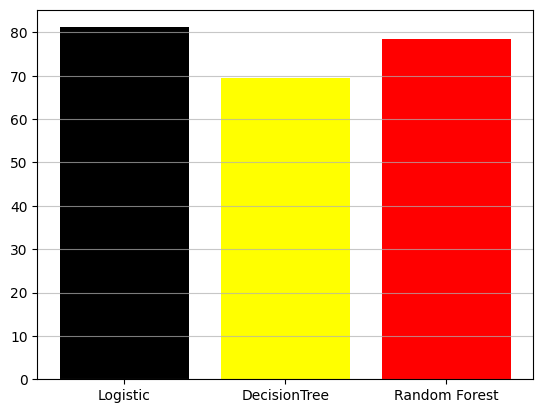

,0
Logistic,81.168831
DecisionTree,69.480519
Random Forest,78.571429


In [174]:
py.grid(axis='y',linestyle='-',alpha=0.7)
# py.grid(axis='x',linestyle='--',alpha=0.7)
py.bar(model_names,accuracies,color=['black','yellow','red'])
py.show()
scores = pd.DataFrame(accuracies,index=model_names)
scores